<a href="https://colab.research.google.com/github/chlin1/TimeSeries/blob/master/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Data processing](https://stackoverflow.com/questions/39674713/neural-network-lstm-input-shape-from-dataframe)

  - Neural Network LSTM input shape from dataframe
  
  - input: dataframe
  - output: 

In [0]:
import pandas as pd
import numpy as np
# Get some time series data
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/timeseries.csv")
df.head()

,Date,A,B,C,D,E,F,G
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09


You can build put inputs into a vector and then use pandas .cumsum() function to build the sequence for the time series:

In [0]:
# Put your inputs into a single list
input_cols=['A','B']
df['single_input_vector'] = df[input_cols].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# Use .cumsum() to include previous row vectors in the current row list of vectors
df['cumulative_input_vectors'] = df.single_input_vector.cumsum()
df

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93]]","[[24.68, 164.93]]"
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89]]","[[24.68, 164.93], [24.18, 164.89]]"
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
5,2008-03-27,24.38,163.46,115.40,27.09,19.72,28.25,59.62,"[[24.38, 163.46]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
6,2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65,"[[24.32, 163.22]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
7,2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.20,"[[24.19, 164.02]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
8,2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18,"[[23.81, 163.59]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."
9,2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64,"[[24.03, 163.32]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164..."


The output can be set up in a similar way, but it will be a single vector instead of a sequence:

In [0]:
# If your output is multi-dimensional, you need to capture those dimensions in one object
# If your output is a single dimension, this step may be unnecessary
output_cols=['F','G']
df['output_vector'] = df[output_cols].apply(tuple, axis=1).apply(list)
df

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors,output_vector
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93]]","[[24.68, 164.93]]","[28.87, 63.44]"
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89]]","[[24.68, 164.93], [24.18, 164.89]]","[27.76, 59.98]"
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[27.04, 59.61]"
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[27.84, 59.41]"
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.02, 60.09]"
5,2008-03-27,24.38,163.46,115.40,27.09,19.72,28.25,59.62,"[[24.38, 163.46]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.25, 59.62]"
6,2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65,"[[24.32, 163.22]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.24, 58.65]"
7,2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.20,"[[24.19, 164.02]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.43, 59.2]"
8,2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18,"[[23.81, 163.59]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[29.17, 56.18]"
9,2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64,"[[24.03, 163.32]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[29.38, 56.64]"


The input sequences have to be the same length to run them through the model, so you need to pad them to be the max length of your cumulative vectors:

In [0]:
# Pad your sequences so they are the same length
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = df.cumulative_input_vectors.apply(len).max()
# Save it as a list   
padded_sequences = pad_sequences(df.cumulative_input_vectors.tolist(), max_sequence_length).tolist()
df['padded_input_vectors'] = pd.Series(padded_sequences).apply(np.asarray)
df

,Date,A,B,C,D,E,F,G,single_input_vector,cumulative_input_vectors,output_vector,padded_input_vectors
0,2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44,"[[24.68, 164.93]]","[[24.68, 164.93]]","[28.87, 63.44]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
1,2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98,"[[24.18, 164.89]]","[[24.68, 164.93], [24.18, 164.89]]","[27.76, 59.98]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
2,2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61,"[[23.99, 164.63]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[27.04, 59.61]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
3,2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41,"[[24.14, 163.92]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[27.84, 59.41]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
4,2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09,"[[24.44, 163.45]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.02, 60.09]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
5,2008-03-27,24.38,163.46,115.40,27.09,19.72,28.25,59.62,"[[24.38, 163.46]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.25, 59.62]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [24, ..."
6,2008-03-28,24.32,163.22,115.56,27.13,19.63,28.24,58.65,"[[24.32, 163.22]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.24, 58.65]","[[0, 0], [0, 0], [0, 0], [0, 0], [24, 164], [2..."
7,2008-03-31,24.19,164.02,115.54,26.74,19.55,28.43,59.20,"[[24.19, 164.02]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[28.43, 59.2]","[[0, 0], [0, 0], [0, 0], [24, 164], [24, 164],..."
8,2008-04-01,23.81,163.59,115.72,27.82,20.21,29.17,56.18,"[[23.81, 163.59]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[29.17, 56.18]","[[0, 0], [0, 0], [24, 164], [24, 164], [23, 16..."
9,2008-04-02,24.03,163.32,115.11,28.22,20.42,29.38,56.64,"[[24.03, 163.32]]","[[24.68, 164.93], [24.18, 164.89], [23.99, 164...","[29.38, 56.64]","[[0, 0], [24, 164], [24, 164], [23, 164], [24,..."


In [0]:
len(df)

11

Training data can be pulled from the dataframe and put into numpy arrays. Note that the input data that comes out of the dataframe will not make a 3D array. It makes an array of arrays, which is not the same thing.

You can use hstack and reshape to build a 3D input array.

In [0]:
# Extract your training data
X_train_init = np.asarray(df.padded_input_vectors)
# Use hstack to and reshape to make the inputs a 3d vector
X_train = np.hstack(X_train_init).reshape(len(df),max_sequence_length,len(input_cols))
y_train = np.hstack(np.asarray(df.output_vector)).reshape(len(df),len(output_cols))

In [0]:
X_train_init[5]

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [ 24, 164],
       [ 24, 164],
       [ 23, 164],
       [ 24, 163],
       [ 24, 163],
       [ 24, 163]])

In [0]:
X_train[5]

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [ 24, 164],
       [ 24, 164],
       [ 23, 164],
       [ 24, 163],
       [ 24, 163],
       [ 24, 163]])

In [0]:
y_train[1]

array([27.76, 59.98])

In [0]:
print(X_train_init.shape)
print(X_train.shape)
print(X_train == X_train_init)

(11,)
(11, 11, 2)
False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


Once you have training data you can define the dimensions of your input layer and output layers.

In [0]:
# Get your input dimensions
# Input length is the length for one input sequence (i.e. the number of rows for your sample)
# Input dim is the number of dimensions in one input vector (i.e. number of input columns)
input_length = X_train.shape[1]
input_dim = X_train.shape[2]
# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(y_train[0])

In [0]:
X_train.shape

(11, 11, 2)

In [0]:
X_train

array([[[  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 24, 164]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 24, 164],
        [ 24, 164]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 24, 164],
        [ 24, 164],
        [ 23, 164]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 24, 164],
        [ 24, 164],
        [ 23, 164],
        [ 24, 163]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0

In [0]:
y_train.shape

(11, 2)

Build the model:

In [0]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# I arbitrarily picked the output dimensions as 4
model.add(LSTM(4, input_dim = input_dim, input_length = input_length))
# The max output value is > 1 so relu is used as final activation.
model.add(Dense(output_dim, activation='relu'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(11, 2))`
  


Finally you can train the model and save the training log as history:

In [0]:
# Set batch_size to 7 to show that it doesn't have to be a factor or multiple of your sample size
history = model.fit(X_train, y_train,
              batch_size=7, nb_epoch=3,
              verbose = 1)

Epoch 1/3
11/11 [==============================] - 0s 2ms/step - loss: 1070.3638 - acc: 1.0000
Epoch 2/3
11/11 [==============================] - 0s 2ms/step - loss: 1004.0063 - acc: 1.0000
Epoch 3/3
11/11 [==============================] - 0s 2ms/step - loss: 944.0716 - acc: 1.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


That's it. Use model.predict(X) where X is the same format (other than the number of samples) as X_train in order to make predictions from the model.

# Deep Learning for Time Series Forecasting 

  - Lesson 01: [Promise of Deep Learning]()
  - Lesson 02: How to Transform Data for Time Series
  - Lesson 03: MLP for Time Series Forecasting
  - Lesson 04: CNN for Time Series Forecasting
  - Lesson 05: LSTM for Time Series Forecasting
  - Lesson 06: CNN-LSTM for Time Series Forecasting
  - Lesson 07: Encoder-Decoder LSTM Multi-step Forecasting

## [Lesson 01: Promise of Deep Learning](https://machinelearningmastery.com/promise-recurrent-neural-networks-time-series-forecasting/)

  - Unlike the simpler problems of classification and regression, time series problems add the complexity of order or temporal dependence between observations.
  
  ### Neural Networks for Time Series
  
  - Robust to Noise. Neural networks are robust to noise in input data and in the mapping function and can even support learning and prediction in the presence of missing values.

  - Nonlinear. Neural networks do not make strong assumptions about the mapping function and readily learn linear and nonlinear relationships.
  
  - Multivariate Inputs. An arbitrary number of input features can be specified, providing direct support for multivariate forecasting.
Multi-Step Forecasts. An arbitrary number of output values can be specified, providing direct support for multi-step and even multivariate forecasting.

  ### Recurrent Neural Networks for Time Series
  -  Learned Temporal Dependence. The context of observations over time is learned. In addition to the general benefits of using neural networks for time series forecasting, recurrent neural networks can also learn the temporal dependence from the data.
  
  ### Summary
  
  - Traditional time series forecasting methods focus on univariate data with linear relationships and fixed and manually-diagnosed temporal dependence.
  - Neural networks add the capability to learn possibly noisy and nonlinear relationships with arbitrarily defined but fixed numbers of inputs and outputs supporting multivariate and multi-step forecasting.
  - Recurrent neural networks add the explicit handling of ordered observations and the promise of learning temporal dependence from context.
  

## Lesson 02: How to Transform Data for Time Series

  - Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable.
  

  
More Information
Time Series Forecasting as Supervised Learning
How to Convert a Time Series to a Supervised Learning Problem in Python
How to Prepare Univariate Time Series Data for Long Short-Term Memory Networks

In [0]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
X_ans=[]
Y_ans=[]
for i in range (len(data["Births"])-2):
    X=list(data["Births"])[i:i+3]
    Y=list(data["Births"])[i+1]
    X_ans.append(X)
    Y_ans.append(Y)
    in_=pd.DataFrame([ str(x) for x in X_ans ],columns=['input'])
    out=pd.DataFrame([ str(x) for x in Y_ans ],columns=['output'])
ans_1=pd.concat([in_,out],axis=1)

In [0]:
def window_transform(dataset, window=2):
	dataX, dataY = [], []
	for i in range(len(dataset)-window):
		print(dataset[i:(i+window)], dataset[(i+window)])
		dataX.append(dataset[i:(i+window)])
		dataY.append(dataset[(i+window)])
	return np.array(dataX), np.array(dataY)

#data1 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
#window_transform(data1)

In [0]:
ans_1

,input,output
0,"[35, 32, 30]",32
1,"[32, 30, 31]",30
2,"[30, 31, 44]",31
3,"[31, 44, 29]",44
4,"[44, 29, 45]",29
5,"[29, 45, 43]",45
6,"[45, 43, 38]",43
7,"[43, 38, 27]",38
8,"[38, 27, 38]",27
9,"[27, 38, 33]",38


### Time Series Forecasting as Supervised Learning

  Time series forecasting can be framed as a supervised learning problem.
  
  - What supervised learning is and how it is the foundation for all predictive modeling machine learning algorithms.
  - The sliding window method for framing a time series dataset and how to use it.
  - How to use the sliding window for multivariate data and multi-step forecasting.
  - summary 
    - Supervised learning is the most popular way of framing problems for machine learning as a collection of observations with inputs and outputs.
    - Sliding window is the way to restructure a time series dataset as a supervised learning problem.
    - Multivariate and multi-step forecasting time series can also be framed as supervised learning using the sliding window method.

#### Supervised Machine Learning
  Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.
  
  - Classification: A classification problem is when the output variable is a category, such as “red” and “blue” or “disease” and “no disease.”
  - Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight.” The contrived example above is a regression problem.


#### Sliding Window For Time Series Data
Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable.

  - The use of prior time steps to predict the next time step is called the sliding window method. 
  - The number of previous time steps is called the window width or size of the lag.
  
  - x(t) - > x(t), y(t)=x(t+1)

#### Sliding Window With Multivariate Time Series Data
Multivariate time series analysis considers simultaneously multiple time series. … It is, in general, much more complicated than univariate time series analysis

  - Univariate Time Series: These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.
  - Multivariate Time Series: These are datasets where two or more variables are observed at each time.
  
 - x1(t), x2(t)->x1(t), x2(t), y(t)=(x1(t+1),x2(t+1))


#### Sliding Window With Multi-Step Forecasting

  - One-Step Forecast: This is where the next time step (t+1) is predicted.
  - Multi-Step Forecast: This is where two or more future time steps are to be predicted.
  - x(t) -> x(t), y1(t)=x(t+1), y2(t)=x(t+2)

### How to Convert a Time Series to a Supervised Learning Problem in Python

  - goal
    - How to develop a function to transform a time series dataset into a supervised learning dataset.
    - How to transform univariate time series data for machine learning.
    - How to transform multivariate time series data for machine learning.

#### Pandas shift() Function

A key function to help transform time series data into a supervised learning problem is the Pandas shift() function.

Given a DataFrame, the shift() function can be used to create copies of columns that are pushed forward (rows of NaN values added to the front) or pulled back (rows of NaN values added to the end).

In [0]:
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-1'] = df['t'].shift(1)
df['t+1'] = df['t'].shift(-1)
print(df)


   t  t-1  t+1
0  0  NaN  1.0
1  1  0.0  2.0
2  2  1.0  3.0
3  3  2.0  4.0
4  4  3.0  5.0
5  5  4.0  6.0
6  6  5.0  7.0
7  7  6.0  8.0
8  8  7.0  9.0
9  9  8.0  NaN


#### The series_to_supervised() Function

series_to_supervised() that takes a univariate or multivariate time series and frames it as a supervised learning dataset.

  - The function takes four arguments:

    - data: Sequence of observations as a list or 2D NumPy array. Required.
    - n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
    - n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
    - dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.

  - The function returns a single value:

    - return: Pandas DataFrame of series framed for supervised learning.


In [0]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t1'] = [x for x in range(10,20)]
print(df.shape)
series_to_supervised(df,n_in=2,n_out=1)


(10, 2)


,var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
2,0.0,10.0,1.0,11.0,2,12
3,1.0,11.0,2.0,12.0,3,13
4,2.0,12.0,3.0,13.0,4,14
5,3.0,13.0,4.0,14.0,5,15
6,4.0,14.0,5.0,15.0,6,16
7,5.0,15.0,6.0,16.0,7,17
8,6.0,16.0,7.0,17.0,8,18
9,7.0,17.0,8.0,18.0,9,19


#### One-Step Univariate Forecasting
  - one-step forecasting: use lagged observations (e.g. t-1) as input variables to forecast the current time step (t).

In [0]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


values = [x for x in range(10)]
data = series_to_supervised(values)
print(data)
	
data1 = series_to_supervised(values, 3)
print(data1)

   var1(t-1)  var1(t)
1        0.0        1
2        1.0        2
3        2.0        3
4        3.0        4
5        4.0        5
6        5.0        6
7        6.0        7
8        7.0        8
9        8.0        9
   var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9


#### Multi-Step or Sequence Forecasting
sequence forecasting or multi-step forecasting: using past observations to forecast a sequence of future observations.

In [0]:
data = series_to_supervised(values, 2, 2)
print(data)

   var1(t-2)  var1(t-1)  var1(t)  var1(t+1)
2        0.0        1.0        2        3.0
3        1.0        2.0        3        4.0
4        2.0        3.0        4        5.0
5        3.0        4.0        5        6.0
6        4.0        5.0        6        7.0
7        5.0        6.0        7        8.0
8        6.0        7.0        8        9.0


#### Multivariate Forecasting

we may have observations of multiple different measures and an interest in forecasting one or more of them.

In [0]:
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values, 1, 2)
print(data)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  var2(t+1)
1        0.0       50.0        1       51        2.0       52.0
2        1.0       51.0        2       52        3.0       53.0
3        2.0       52.0        3       53        4.0       54.0
4        3.0       53.0        4       54        5.0       55.0
5        4.0       54.0        5       55        6.0       56.0
6        5.0       55.0        6       56        7.0       57.0
7        6.0       56.0        7       57        8.0       58.0
8        7.0       57.0        8       58        9.0       59.0


### How to Prepare Univariate Time Series Data for Long Short-Term Memory Networks

  - Load data
  - Drop time
  - Split into Samples: LSTMs need to process samples where each sample is a single time series. (LSTMs work better with 200-to-400 time steps )
  - Reshape Subsequences: The LSTM needs data with the format of [samples, time steps and features].
  

In [0]:
from numpy import array

# load...
data = list()
n = 5000
for i in range(n):
	data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


In [0]:
# drop time
data = data[:, 1]
print(data.shape)
data

(5000,)


array([   10,    20,    30, ..., 49980, 49990, 50000])

In [0]:
# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
	# grab from i to i + 200
	sample = data[i:i+length]
	samples.append(sample)
print(len(samples))
print(len(samples[1]))

25
200


In [0]:
# convert list of arrays into 2d array
data = array(samples)
print(data.shape)

(25, 200)


In [0]:
# reshape into [samples, timesteps, features]
# expect [25, 200, 1]
data = data.reshape((len(samples), length, 1))
print(data.shape)

(25, 200, 1)


### How to Load and Explore Time Series Data in Python

  - How to load your time series dataset from a CSV file using Pandas.
    - A Series is a one-dimensional array with a time label for each row.
    - the read_csv() function
      - header=0: We must specify the header information at row 0.
      - parse_dates=[0]: We give the function a hint that data in the first column contains dates that need to be parsed. This argument takes a list, so we provide it a list of one element, which is the index of the first column.
      - index_col=0: We hint that the first column contains the index information for the time series.
      - squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.
  - How to peek at the loaded data and calculate summary statistics.
    - the head() function to peek at the first 5 records or specify the first n number of records to review.
    -   tail() function to get the last n records of the dataset.
    - The describe() function creates a 7 number summary of the loaded time series including mean, standard deviation, median, minimum, and maximum of the observations.
  - How to plot and review your time series data.
    - the plot() function

In [0]:
# Load birth data
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.head())

In [0]:
# Load birth data using read_csv
from pandas import read_csv
series = read_csv('daily-total-female-births-in-cal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

In [0]:
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.size)

In [0]:
# Querying By Time
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series['1959-01'])

In [0]:
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.describe())

In [0]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
pyplot.plot(series)
pyplot.show()

### [How To Load Machine Learning Data in Python](https://machinelearningmastery.com/load-machine-learning-data-python/)

### [How to Handle Missing Timesteps in Sequence Prediction Problems with Python](https://machinelearningmastery.com/handle-missing-timesteps-sequence-prediction-problems-python/)


### [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)

### [How To Resample and Interpolate Your Time Series Data With Python](https://machinelearningmastery.com/resample-interpolate-time-series-data-python/)

### [How to Handle Very Long Sequences with Long Short-Term Memory Recurrent Neural Networks](https://machinelearningmastery.com/handle-long-sequences-long-short-term-memory-recurrent-neural-networks/)

### [How to Prepare Sequence Prediction for Truncated Backpropagation Through Time in Keras](https://machinelearningmastery.com/truncated-backpropagation-through-time-in-keras/)

## Lesson 03: MLP for Time Series Forecasting

  - develop a Multilayer Perceptron model or MLP for univariate time series forecasting.
  
  - We will define the number of input time steps as 3 via the input_dim argument on the first hidden layer. (e will frame the problem to have 3 inputs and 1 output, for example: [10, 20, 30] as input and [40] as output.) In this case we will use the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.
  
  - More Information
Crash Course On Multi-Layer Perceptron Neural Networks
Time Series Prediction With Deep Learning in Keras
Exploratory Configuration of a Multilayer Perceptron Network for Time Series Forecasting

In [0]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[81.55059]]


In [0]:
array([50, 60, 70]).shape

(3,)

In [0]:
x_input.shape

(1, 3)

### [Crash Course On Multi-Layer Perceptron Neural Networks](https://machinelearningmastery.com/neural-networks-crash-course/)

### [Time Series Prediction With Deep Learning in Keras](https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/)

## Lesson 04: CNN for Time Series Forecasting

  - develop a Convolutional Neural Network model or CNN for univariate time series forecasting.
  
  - An important difference from the MLP model is that the CNN model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly.
  
  - We will define the number of input time steps as 3 and the number of features as 1 via the input_shape argument on the first hidden layer.

  - We will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction. The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.
  
  - More Information
Crash Course in Convolutional Neural Networks for Machine Learning

In [0]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[81.96897]]


### [https://machinelearningmastery.com/crash-course-convolutional-neural-networks/](https://machinelearningmastery.com/crash-course-convolutional-neural-networks/)

## Lesson 05: LSTM for Time Series Forecasting

  - develop a Long Short-Term Memory Neural Network model or LSTM for univariate time series forecasting.
  
  - An important difference from the MLP model, and like the CNN model, is that the LSTM model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly.
  
  - We will define the number of input time steps as 3 and the number of features as 1 via the input_shape argument on the first hidden layer.
  
  - We will use one LSTM layer to process each input sub-sequence of 3 time steps, followed by a Dense layer to interpret the summary of the input sequence. The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.
  
  - More Information
A Gentle Introduction to Long Short-Term Memory Networks by the Experts
Crash Course in Recurrent Neural Networks for Deep Learning

In [0]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[83.627106]]


### [A Gentle Introduction to Long Short-Term Memory Networks by the Experts](https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)

### [Crash Course in Recurrent Neural Networks for Deep Learning](https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/)

## Lesson 06: CNN-LSTM for Time Series Forecasting
  - develop a hybrid CNN-LSTM model for univariate time series forecasting.
  
  - The benefit of this model is that the model can support very long input sequences that can be read as blocks or subsequences by the CNN model, then pieced together by the LSTM model.
  
  - When using a hybrid CNN-LSTM model, we will further divide each sample into further subsequences. The CNN model will interpret each sub-sequence and the LSTM will piece together the interpretations from the subsequences. As such, we will split each sample into 2 subsequences of 2 times per subsequence.
  
  - The CNN will be defined to expect 2 time steps per subsequence with one feature. The entire CNN model is then wrapped in TimeDistributed wrapper layers so that it can be applied to each subsequence in the sample. The results are then interpreted by the LSTM layer before the model outputs a prediction.
  
  - The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse’) loss function.
  
  - More Information
CNN Long Short-Term Memory Networks
How to Use the TimeDistributed Layer for Long Short-Term Memory Networks in Python

In [0]:
# univariate cnn-lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# define dataset
X = array([[10, 20, 30, 40], [20, 30, 40, 50], [30, 40, 50, 60], [40, 50, 60, 70]])
y = array([50, 60, 70, 80])
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
X = X.reshape((X.shape[0], 2, 2, 1))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
# input (sample, timesteps, features) output (sample, timesteps, fiters)
# filters: the dimensionality of the output space (i.e. the number of output filters in the convolution)
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70, 80])
x_input = x_input.reshape((1, 2, 2, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[92.38901]]


  - Conv1D
    - keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
    - 1D convolution layer (e.g. temporal convolution).
    - When using this layer as the first layer in a model, provide an input_shape argument (tuple of integers or None, does not include the batch axis), e.g. input_shape=(10, 128) for time series sequences of 10 time steps with 128 features per step in data_format="channels_last", or (None, 128) for variable-length sequences with 128 features per step.
    
    - Input shape: 3D tensor with shape: (batch, steps, channels)
    - Output shape: 3D tensor with shape: (batch, new_steps, filters) steps value might have changed due to padding or strides.
    
  - Conv2D
    - keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
    - 2D convolution layer (e.g. spatial convolution over images).
    - When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the batch axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".
    - Input shape: 4D tensor with shape: (batch, channels, rows, cols) if data_format is "channels_first" or 4D tensor with shape: (batch, rows, cols, channels) if data_format is "channels_last".
    - Output shape: 4D tensor with shape: (batch, filters, new_rows, new_cols) if data_format is "channels_first" or 4D tensor with shape: (batch, new_rows, new_cols, filters) if data_format is "channels_last". rows and cols values might have changed due to padding.
   

## Lesson 07: Encoder-Decoder LSTM Multi-step Forecasting
  - develop an Encoder-Decoder LSTM Network model for multi-step time series forecasting.
  
  - We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next two values in the sequence. We will frame the problem to have 3 inputs and 2 outputs, for example: [10, 20, 30] as input and [40, 50] as output.

  - The LSTM model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly. The output must also be shaped this way when using the Encoder-Decoder model.

  - We will define the number of input time steps as 3 and the number of features as 1 via the input_shape argument on the first hidden layer.

  - We will define an LSTM encoder to read and encode the input sequences of 3 time steps. The encoded sequence will be repeated 2 times by the model for the two output time steps required by the model using a RepeatVector layer. These will be fed to a decoder LSTM layer before using a Dense output layer wrapped in a TimeDistributed layer that will produce one output for each step in the output sequence.

  - The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.
  
  - More Information
Encoder-Decoder Long Short-Term Memory Networks
4 Strategies for Multi-Step Time Series Forecasting
Multi-step Time Series Forecasting with Long Short-Term Memory Networks in Python

In [0]:
# multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([[40,50],[50,60],[60,70],[70,80]])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
model.add(RepeatVector(2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[[80.51463]
  [92.3284 ]]]


### Encoder-Decoder Long Short-Term Memory Networks
The Encoder-Decoder LSTM is a recurrent neural network designed to address sequence-to-sequence problems, sometimes called seq2seq. For example, text translation and learning to execute programs are examples of seq2seq problems.

  - The challenge of sequence-to-sequence prediction.
    - One modeling concern that makes these problems challenging is that the length of the input and output sequences may vary. Given that there are multiple input time steps and multiple output time steps, this form of problem is referred to as many-to-many type sequence prediction problem.
  - The Encoder-Decoder architecture and the limitation in LSTMs that it was designed to address.
    - RNN Encoder-Decoder, consists of two recurrent neural networks (RNN) that act as an encoder and a decoder pair. The encoder maps a variable-length source sequence to a fixed-length vector, and the decoder maps the vector representation back to a variable-length target sequence.
  - How to implement the Encoder-Decoder LSTM model architecture in Python with Keras.


####  Encoder-Decoder LSTM Architecture
  - One approach to seq2seq prediction problems that has proven very effective is called the Encoder-Decoder LSTM.

  - This architecture is comprised of two models: one for reading the input sequence and encoding it into a fixed-length vector, and a second for decoding the fixed-length vector and outputting the predicted sequence. The use of the models in concert gives the architecture its name of Encoder-Decoder LSTM designed specifically for seq2seq problems.

  - The innovation of this architecture is the use of a fixed-sized internal representation in the heart of the model that input sequences are read to and output sequences are read from. For this reason, the method may be referred to as sequence embedding.

  - This approach has also been used with image inputs where a Convolutional Neural Network is used as a feature extractor on input images, which is then read by a decoder LSTM.



#### Implement Encoder-Decoder LSTMs in Keras
  - the model as being comprised of two key parts: the encoder and the decode
  - First, the input sequence is shown to the network one encoded character at a time. We need an encoding level to learn the relationship between the steps in the input sequence and develop an internal representation of these relationships.
  - One or more LSTM layers can be used to implement the encoder model. The output of this model is a fixed-size vector that represents the internal representation of the input sequence. The number of memory cells in this layer defines the length of this fixed-sized vector.
   
  - The decoder must transform the learned internal representation of the input sequence into the correct output sequence.
  - As with the Vanilla LSTM, a Dense layer is used as the output for the network. The same weights can be used to output each time step in the output sequence by wrapping the Dense layer in a TimeDistributed wrapper.
  - the encoder will produce a 2-dimensional matrix of outputs, where the length is defined by the number of memory cells in the layer. The decoder is an LSTM layer that expects a 3D input of [samples, time steps, features] in order to produce a decoded sequence of some different length defined by the problem.
  - The RepeatVector layer can be used like an adapter to fit the encoder and decoder parts of the network together. We can configure the RepeatVector to repeat the fixed length vector one time for each time step in the output sequence.
    - Input shape: 2D tensor of shape (num_samples, features).
    - Output shape: 3D tensor of shape (num_samples, n, features).
  
  - To summarize, the RepeatVector is used as an adapter to fit the fixed-sized 2D output of the encoder to the differing length and 3D input expected by the decoder. The TimeDistributed wrapper allows the same output layer to be reused for each element in the output sequence.
  

In [0]:
# encoder
# The number of memory cells in this layer defines the length of this fixed-sized vector.
model = Sequential()
model.add(LSTM(..., input_shape=(...)))
#  the RepeatVector is used as an adapter to fit the fixed-sized 2D output of the encoder to the differing length and 3D input expected by the decoder
model.add(RepeatVector(...))
# decoder
model.add(LSTM(..., return_sequences=True))
model.add(TimeDistributed(Dense(...)))
# get the output from the Dense at each time step that the wrapper receives as input.

## Summary

  - The promise of deep learning neural networks for time series forecasting problems.
  - How to transform a time series dataset into a supervised learning problem.
  - How to develop a Multilayer Perceptron model for a univariate time series forecasting problem.
  - How to develop a Convolutional Neural Network model for a univariate time series forecasting problem.
  - How to develop a Long Short-Term Memory network model for a univariate time series forecasting problem.
  - How to develop a Hybrid CNN-LSTM model for a univariate time series forecasting problem.
  - How to develop an Encoder-Decoder LSTM model for a multi-step time series forecasting problem.

# Play with the other data set

the dataset from here: [daily-total-female-births.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv)

In [1]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("bright", 10)
from numpy import array
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

Using TensorFlow backend.


365
         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


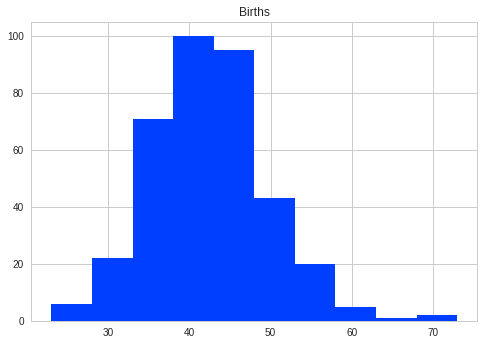

In [5]:
# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df = pd.read_csv(url)
# Verify
print(len(df))
print(df.head())
df.hist();


In [6]:
 
# You do not need the date. This is sequential, each and every day. Numbers will be integer
 
births = df['Births'].tolist()
# Verify
print(births[:5])

[35, 32, 30, 31, 44]


In [7]:
# Transform to windowed array
# Will return n elements PLUS the dependent variable for a total of n+1 elements.
# This a list of lists that will be turned into a numpy matrix. It is a sliding window.
window_size = 3
array = []
[array.append(births[index:index+window_size+1]) for index in range(len(births)-(window_size))]
array = np.array(array)
# Verify
print(array)
print('array length =', array.shape)
print(df.head())
df.tail()

[[35 32 30 31]
 [32 30 31 44]
 [30 31 44 29]
 ...
 [34 37 52 48]
 [37 52 48 55]
 [52 48 55 50]]
array length = (362, 4)
         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [8]:
# We can not use model_selection.train_test_split BECAUSE we need to keep the date order intact. 
# Since this model uses a random seed it gets rid of the date order.
# Just split up the sets simply.
test_size = .7
length = array.shape[0]
nof_rows = int(test_size * length)
X_train = array[:nof_rows, :window_size]
X_validation = array[nof_rows:, :window_size]
Y_train = array[:nof_rows, -1]
Y_validation = array[nof_rows:, -1]
# Verify
print('X_train set first 5 rows are \n', X_train[:5])
print('X_train shape is', X_train.shape)
print('Y_train set first 5 items are \n', Y_train[:5])
print('Y_train shape is', Y_train.shape)
print('X_validation set first 5 rows are \n', X_validation[:5])
print('X_validation shape is', X_validation.shape)
print('Y_validation set first 5 rows are \n', Y_validation[:5])
print('Y_validation shape is', Y_validation.shape)

X_train set first 5 rows are 
 [[35 32 30]
 [32 30 31]
 [30 31 44]
 [31 44 29]
 [44 29 45]]
X_train shape is (253, 3)
Y_train set first 5 items are 
 [31 44 29 45 43]
Y_train shape is (253,)
X_validation set first 5 rows are 
 [[42 53 42]
 [53 42 34]
 [42 34 40]
 [34 40 56]
 [40 56 44]]
X_validation shape is (109, 3)
Y_validation set first 5 rows are 
 [34 40 56 44 53]
Y_validation shape is (109,)


In [9]:
# Create model
model = Sequential()
model.add(Dense(100, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Fit model
model.fit(X_train, Y_train, epochs=500, verbose=0);

Instructions for updating:
Use tf.cast instead.


In [12]:
# Prediction on training set vs actual training dependent variable
rows = X_train.shape[0]
x_input = X_train.reshape(rows, window_size)
training_predictions = model.predict(x_input, verbose=0)
# Verify
print(training_predictions[:3])
print(Y_train[:3])

[[34.297314]
 [33.220436]
 [36.78745 ]]
[31 44 29]


In [19]:
# Create dataframe for plotting and analysis
dftc = pd.DataFrame(training_predictions, Y_train).reset_index()
dftc.head()

,index,0
0,31,34.297314
1,44,33.220436
2,29,36.787449
3,45,34.020874
4,43,38.698242


In [20]:
# It called the training_actual_births 'index' and the training_predictions '0'. Fix column names.
dftc.columns = ['training_actual_births', 'training_predictions']
# Find absolute error and percent
dftc['delta_error'] = (dftc['training_predictions'] - dftc['training_actual_births']).abs()
dftc['percent_error'] = (dftc['delta_error'] / dftc['training_actual_births']) * 100
t_mean = dftc['percent_error'].mean()
# Verify
print(len(dftc))
print(t_mean)
dftc.head(5)

253
15.178864768164114


,training_actual_births,training_predictions,delta_error,percent_error
0,31,34.297314,3.297314,10.636496
1,44,33.220436,10.779564,24.499009
2,29,36.787449,7.787449,26.853272
3,45,34.020874,10.979126,24.398058
4,43,38.698242,4.301758,10.004088


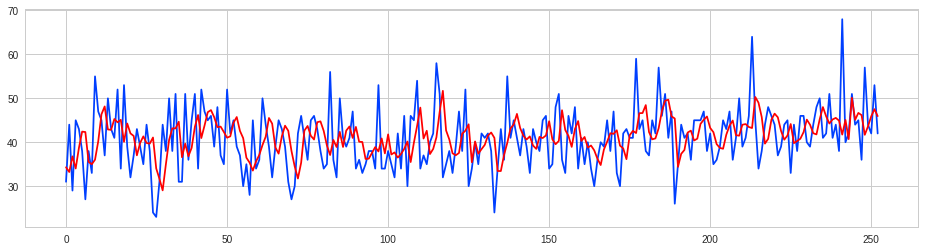

In [21]:
# plot, blue is actual, red is predicted
pyplot.figure(figsize=(16, 4))
pyplot.plot(dftc['training_actual_births'])
pyplot.plot(dftc['training_predictions'], color='red')
pyplot.show()

In [22]:
# Prediction on validaton set vs actual validation dependent variable
rows = X_validation.shape[0]
x_input = X_validation.reshape(rows, window_size)
validation_predictions = model.predict(x_input, verbose=0)
# Verify
print(validation_predictions[:3])
print(Y_validation[:3])
 

[[46.61556 ]
 [42.579063]
 [39.114754]]
[34 40 56]


In [23]:
# Create dataframe for plotting and analysis
dfvc = pd.DataFrame(validation_predictions, Y_validation).reset_index()
dfvc.head()

,index,0
0,34,46.615559
1,40,42.579063
2,56,39.114754
3,44,44.287727
4,53,47.603264


In [24]:
# It called the training_actual_births 'index' and the training_predictions '0'. Fix column names.
dfvc.columns = ['validation_actual_births', 'validation_predictions']
# Find absolute error and percent
dfvc['delta_error'] = (dfvc['validation_predictions'] - dfvc['validation_actual_births']).abs()
dfvc['percent_error'] = (dfvc['delta_error'] / dfvc['validation_actual_births']) * 100
v_mean = dfvc['percent_error'].mean()
print(v_mean)
print(len(dfvc))
dfvc.head(5)

13.221568427089426
109


,validation_actual_births,validation_predictions,delta_error,percent_error
0,34,46.615559,12.615559,37.104584
1,40,42.579063,2.579063,6.447659
2,56,39.114754,16.885246,30.152225
3,44,44.287727,0.287727,0.653926
4,53,47.603264,5.396736,10.182521


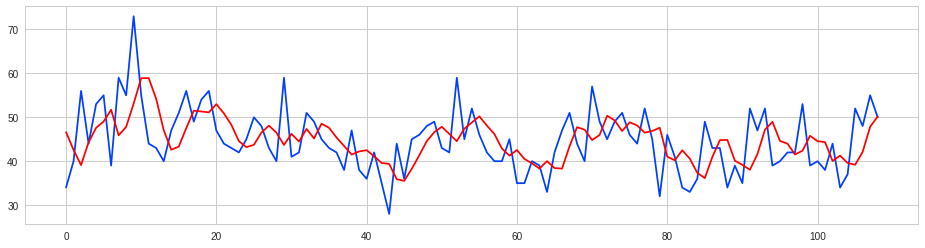

In [25]:
# plot, blue is actual, red is predicted
pyplot.figure(figsize=(16, 4))
pyplot.plot(dfvc['validation_actual_births'])
pyplot.plot(dfvc['validation_predictions'], color='red')
pyplot.show()

In [26]:
# Print the Mean Average Error and the Root Mean Square Error
root_mean_square_error = np.sqrt(mse(dfvc['validation_actual_births'], dfvc['validation_predictions'])) 
print('There was a', round(t_mean, 2), '% mean average error for the training set.')
print('There was a', round(v_mean, 2), '% mean average error for the validation set.')
print('There was a', round(dfvc['delta_error'].mean(), 2), 'mean average error for the validation set.')
print('There was a', round(root_mean_square_error, 2), 'root mean square error for the validation set.')
 

There was a 15.18 % mean average error for the training set.
There was a 13.22 % mean average error for the validation set.
There was a 5.84 mean average error for the validation set.
There was a 7.11 root mean square error for the validation set.
